## Content



- What Are Ensemble Models?
    - What are the Types of Ensembles?


- What is Bagging?

- Can we make Emsemble from DTs? - Random Forest
    - Intuition

- How to make base learners as different as possible ?

- What are the properties of base learners ?

- Why does bagging reduce Variance ?


- Random Forest Code Implementation
    - Hyperparam tuning
    - Randomized Search

- OOB points
    - OOB score


- Interview Que

    - Can we compute Feature Importances?

    - Bias Variance tradeoff
        - Number of Trees
        - Row Sample Size
        - Number of Columns Sampled
        - Depth of Base Learners
        - ccp_alpha




## What are ensembles ?

Till now we have trained only one model for one task. But we have learnt many kinds of models.

#### Question: Do you think we could somehow use multiple models for the same task?

What if we can **train multiple base learners or models** which are as different as possible and **combine them smartly**?

* For example: Instead of training one Decision tree we can train 100 decision trees and combine them
* This is the **key principle of ensemble**


The word ensemble in english means multiple things, roughly it means **mixing** or **coming together**.

 * We can also train various machine learning models like Decision Tree, Logistic Regression, KNN and can combine them smartly.



<img src='https://drive.google.com/uc?id=15VKC1k8bPybf4L8PFXF2q-Ed2Bjw2yWg'>


### What are the types of ensembles ?

There are four main types of ensemble
1. Bagging
 * Example : Random Forest
2. Boosting
 * Example : GBDT
3. Stacking
4. Cascading

Also, a mix of each of these can be possible



<img src='https://drive.google.com/uc?id=1sVqrpqPbMsHEaiC5XGtj7OCRoWEhKtIV'>


#### **QUIZ -1**

```
Select the types of Ensemble Methods

1. Bagging, Stacking
2. Collecting
3. Standardizing
4. Selecting


```
**ANSWER**
1. Bagging, Stacking

## What is Bagging?

Let's try to understand bagging from simple example:

Suppose you want to buy new iphone.
- you aren't sure whether you should or not

So you ask your friends and family for opinion
- First person is your friend who is mircoprocessor engineer
- Second person is your cousin who works as a cinemetographer
- Third is your mother.








<img src='https://drive.google.com/uc?id=1tnYI6u7jNRMFYBEHOBx6i1mKU1QNB-sc'>


You got a mixed responses
- Your friend says **yes** as the chipset performance is great
- Cousin also says **yes** as he loves the cinematic mode.
- But your mother says **No** as it's expensive and waste of money.

So, in order to simplify things, you decide to take **majority vote**
- 2 yes and 1 no comes out to be **YES**

This is what **bagging** does.

Instead of training one model on data, we training multiple models on data.

In short,

**Bagging refers to training different models for the same task, independently of each other and then cleverly combining their predictions.**




#### Question: Let's say we have 3 different models, *M1, M2, M3* and all are trained for the same regression task to predict credit score. Can you think of a simple way to use predictions from these 3 different models together ?







<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/170/539/original/Question-_M1__M2__M3.jpeg?1765550961' width='800'></center>

Let us learn a special bagging model first, later we will also learn more about the other kinds of ensembles

## Can we make an Ensemble from DTs? - Random Forest

Although, bagging can be done using models from different ML algorithms, let's try to make a bagging model just using **Decision Trees**. This is a special case of Bagging, known as the **Random Forest (RF)** model.


### Intuition

Bagging stand for Bootstrapped Aggregation.

We'll come to Bootstrapping later.

But, let's see the the intuition first


- We basically **train $k$ different models**($M_1,M_2,....M_k$) and these models are called **Base Learners**.

* This is followed by **Aggregation**
    * We use majority vote for Classification
    * We use Mean/Median for Regression

Hence we see that just like DT, RF also works for both classification and regression

**DO NOTE that we want all the base learners to be as different as possible.**



<center><img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/170/540/original/Intuition.png?1765551046' width=800></center>







#### **QUIZ-2**
```
How many decision trees are there in a random forest?

1. A random Forest consists of a single Decision Tree

2. A random forest is a collection of decision trees

3. None of the above

```
**ANSWER**
2. A random forest is a collection of decision trees

## How to make base learners as different as possible?

Here, the major thing is that the $k$ models should be different from one another as there is no use if all the models are same.






### **Is making the models "different" really important?**

To further understand this, assume that instead of people with different expertise (engineer, photographer, mother),
- you called 3 friends who are all iphone die hard fans.

- If all of them have very similar opinions, the 2 extra experts don't add much value.

* It is important that each expert has a different "take" on the issue and the combined decision can then be expected to be more reliable and robust.



### **But how to ensure that all the models are different?**

We basically train each base learner on a subset of data.

**Remember bootstapping?**
- Boostrapping in stats basically means to resample a single dataset to create multiple datasets.

In Random Forest, for each tree $M_i$,
- we randomly select a subset of training data. This is known as **row sampling**.

* we can select a subset of the columns. This is known as **column sampling**

* We can **tune the depth** of the tree. Deeper trees have a higher chance of being different from each other.

Hence, we have many different trees, trained on a different subset of points, and different combinations of features.

Let us assume a train data set $D_{Tr}$ with $n$ data points i.e $D_n$
- Now, we **sample $m$ data points with replacement** to get $D^1_m$
- Simlarly, we **sample $d'$ columns**.

We then train our model $M_1$ on $D^1m$

Similarly, we sample $m$ datapoints with replacement to get $D^2_m$ and
- train our model $M_2$ on $D^2_m$

<img src='https://drive.google.com/uc?id=1M0jzMtHBUGU41ldGm95NbO6FdxCQ24Ds'>


<img src='https://drive.google.com/uc?id=13847Mxmx-lcNglvlgpQmC3C6k1TSdDs5'>



> **Instructor Note**
> - **Interview Question**: What is "random" in random forests?
> - Ans: Each tree has been trained on a random subset of rows and columns against the target column.

**QUIZ-3**

```
What is the reason for introducing Row/Column Sampling in Random Forests?

1. For decreasing the training time of Random Forests
2. For tackling the problem of underfitting in base learners
3. For dealing with missing values
4. For tackling the problem of overfitting in base learners

```
**ANSWER**
4. For tackling the problem of overfitting in base learners



## What are the properties of base learners?



The Decision tree base learners in random forest are **Deep Decision Trees (non-shallow)**.

As they are deep,
- the models overfit slightly on a sub sample of data, as the base learners are made of $m$ rows and $d'$ columns only.

Now, we perform aggregation\averaging on these slightly overfit models (high variance and low bias)

- This aggregation helps in reducing the variance of the model.

But, how? Let's see





<img src='https://drive.google.com/uc?id=1TZFIobjeaDkNolHkyM4B7yPhuY1CJ2Je'>



## **Why does bagging reduce Variance?**







#### (Recall) Question: What does overfit mean ?



<img src='https://drive.google.com/uc?id=15GEUM05_bRLlgz9jFfiAvRKb3a5OiWIg'>


<img src='https://drive.google.com/uc?id=1I1X2h7QxjbM_Ip9GJKfA7biFqhRX89jL'>

Let's try to understand the intuition behind how bagging reduces variance

- Say, we had $n$ points in our training data
- we sampled $m$ points and made $k$ samples for $k$ models.


Remember, **High variance model means model changes if data points change slightly.**

and

**Base learners are high variance, low bias models**


<img src='https://drive.google.com/uc?id=1zaJJ2A_ndYgidvuQNUX5zGlSCd7Tu--G'>



Let's assume
- we are representing varying datapoint using <font color = '#F6BE00'>yellow point </font>

#### Question: When we sample, how many sample will contain yellow point ?

Only a handful of samples will have <font color = '#F6BE00'> yellow point </font>

when there's a change in <font color ='#F6BE00'> yellow datapoint </font>,
- it'll only impact handful of base learners

On top of that, we are aggregating the results of all base learners
- so it'll negate the impact of noise/ variance in datapoints.

Hence, reducing the variance.

There is also a statistical proof for this but it is out of scope for this lecture.







* In statistical Machine learning the error of a model can be represented as

 * **Error = Bias$^2$ + Varinace + Irreducable error.**
 * Here we saw due to aggregation, the variance decreases without trading-off to bias, due to which the overall error of the model decreases.
* Therefore the error of the random forest reduces.





<img src='https://drive.google.com/uc?id=1uIyeO0Apd_ClcAdYL-91wMjU9M5YOUcy'>


## Summarizing


The core working of a random forest:
  1. It uses Bagging,  which is row sampling, and column sampling
  2. It takes Base learners  which are slightly overfit i.e having high variance and low bias
  3. It reduces this variance by aggregation without much increase in its bias.



<img src='https://drive.google.com/uc?id=1HayWwymSPwsHn1MWBRYcvcJ37_tg8mYy'>



## Sklearn Code Walkthrough


Usecase: Credit Default Prediction

Credit default is one of the most important problems in the banking and risk analytics industry.
- There are various attributes which can be used to predict default, such as
    - demographic data (age, income, employment status, etc.),
    - behavioural data (past loans, payment, number of times a credit payment has been delayed by the customer etc.).

Let's look into the data

### Data Understanding and Cleaning

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!curl -L -o credit-card-default.csv https://drive.google.com/uc?id=1qobd8ZdTaKHhYOoQjzhgsgh4VTmcKmR9


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 2829k  100 2829k    0     0  4638k      0 --:--:-- --:--:-- --:--:-- 4638k


In [ ]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('credit-card-default.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Let's understand the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

Feature  | Description
-------------------|------------------
ID | ID of each client
LIMIT_BAL | Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX | Gender (1=male, 2=female)
EDUCATION | (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE | Marital status (1=married, 2=single, 3=others)
AGE | Age in years
PAY_0 | Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2 | Repayment status in August, 2005 (scale same as above)
PAY_3 | Repayment status in July, 2005 (scale same as above)
PAY_4 | Repayment status in June, 2005 (scale same as above)
PAY_5 | Repayment status in May, 2005 (scale same as above)
PAY_6 | Repayment status in April, 2005 (scale same as above)
BILL_AMT1 | Amount of bill statement in September, 2005
BILL_AMT2 | Amount of bill statement in August, 2005
BILL_AMT3 | Amount of bill statement in July, 2005
BILL_AMT4 | Amount of bill statement in June, 2005
BILL_AMT5 | Amount of bill statement in May, 2005
BILL_AMT6 | Amount of bill statement in April, 2005
PAY_AMT1 | Amount of previous payment in September, 2005
PAY_AMT2 | Amount of previous payment in August, 2005
PAY_AMT3 | Amount of previous payment in July, 2005
PAY_AMT4 | Amount of previous payment in June, 2005
PAY_AMT5 | Amount of previous payment in May, 2005
PAY_AMT6 | Amount of previous payment in April, 2005
defaulted  | Default payment (1=yes, 0=no)

In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

### Data Preparation and Model Building

In [ ]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = df.drop('defaulted',axis=1)

# Putting response variable to y
y = df['defaulted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)



#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [ ]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Making predictions
predictions = rfc.predict(X_test)

In [ ]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7058
           1       0.65      0.36      0.46      1942

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [ ]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6679  379]
 [1246  696]]


In [ ]:
print(accuracy_score(y_test,predictions))

0.8194444444444444


So far so good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Hyperparameter Tuning

sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html



<img src='https://drive.google.com/uc?id=1y5rqnCK6dsxXt42qDvo9fq6VejGc6UJv'>



The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


**Instructor Note:**
- The following code takes a lot of time to
run.
- Run it in advance and show the results to learners

#### Tuning max_depth

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.070924,0.162969,0.031927,0.006472,2,{'max_depth': 2},0.807143,0.802619,0.801667,0.794286,...,0.800762,0.004337,4,0.803750,0.799881,0.798988,0.799821,0.800298,0.800548,0.001657
1,2.826499,0.263061,0.051572,0.013847,7,{'max_depth': 7},0.817619,0.820476,0.816190,0.813095,...,0.816762,0.002384,2,0.833690,0.832976,0.831905,0.833452,0.833095,0.833024,0.000614
2,5.150504,1.272123,0.075142,0.011372,12,{'max_depth': 12},0.815714,0.820714,0.820952,0.812619,...,0.817381,0.003148,1,0.882560,0.883452,0.882083,0.887083,0.886607,0.884357,0.002084
3,6.912656,0.499430,0.198055,0.182883,17,{'max_depth': 17},0.816667,0.814048,0.821905,0.811905,...,0.816095,0.003342,3,0.927143,0.931012,0.931071,0.932560,0.928988,0.930155,0.001886


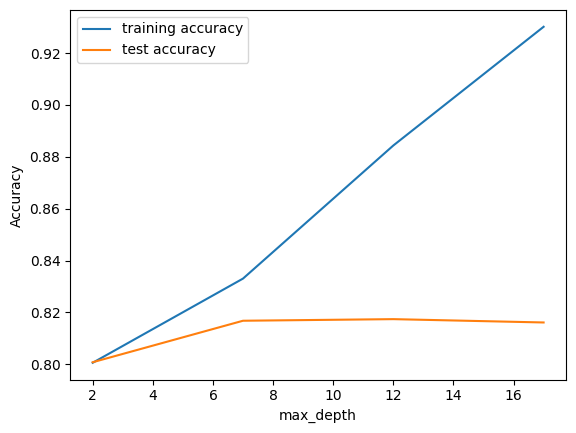

In [ ]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_depth"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both train and test scores increase till a point, but after that test score starts to decrease. The ensemble tries to overfit as we increase the max_depth.

Thus, controlling the depth of the constituent trees will help reduce overfitting in the forest.

#### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.713347,0.230664,0.038948,0.007294,100,{'n_estimators': 100},0.810952,0.814048,0.810476,0.805952,...,0.810143,0.002619,1,0.811607,0.810179,0.811310,0.813571,0.812440,0.811821,0.001136
1,8.189750,0.484923,0.163603,0.030333,500,{'n_estimators': 500},0.810714,0.814048,0.811190,0.806429,...,0.809714,0.003006,4,0.810952,0.810060,0.811607,0.812619,0.812917,0.811631,0.001054
2,15.325885,0.566680,0.337282,0.080962,900,{'n_estimators': 900},0.811190,0.814524,0.810714,0.805000,...,0.809762,0.003285,3,0.811012,0.810357,0.811726,0.812560,0.813036,0.811738,0.000979
3,22.534391,2.307486,0.434401,0.061855,1300,{'n_estimators': 1300},0.811429,0.814286,0.811190,0.805714,...,0.810000,0.003068,2,0.811071,0.810357,0.811488,0.812679,0.812798,0.811679,0.000938


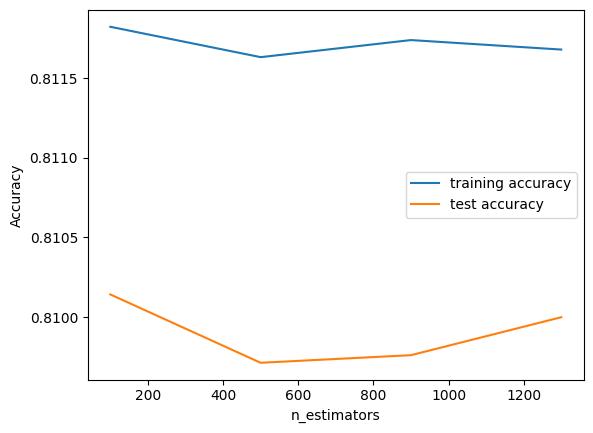

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_n_estimators"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [ ]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.714290,0.259760,0.036020,0.005050,4,{'max_features': 4},0.811905,0.814524,0.811429,0.804524,...,0.809810,0.003662,5,0.810833,0.811250,0.812143,0.812857,0.811190,0.811655,0.000740
1,2.878650,0.242324,0.034693,0.005791,8,{'max_features': 8},0.818095,0.821190,0.818810,0.817381,...,0.818810,0.001287,1,0.821190,0.820476,0.822024,0.821548,0.821488,0.821345,0.000510
2,4.758686,0.462622,0.035259,0.005953,14,{'max_features': 14},0.816905,0.821905,0.819048,0.815714,...,0.818238,0.002127,4,0.822143,0.820952,0.821845,0.822262,0.821607,0.821762,0.000465
3,6.596921,0.247338,0.040513,0.007474,20,{'max_features': 20},0.817381,0.821429,0.820476,0.816190,...,0.818762,0.001937,2,0.822202,0.821071,0.822143,0.822738,0.822321,0.822095,0.000553
4,7.790174,0.384929,0.039176,0.008726,24,{'max_features': 24},0.818095,0.821190,0.819524,0.815714,...,0.818524,0.001810,3,0.822679,0.821012,0.821607,0.822976,0.823036,0.822262,0.000809


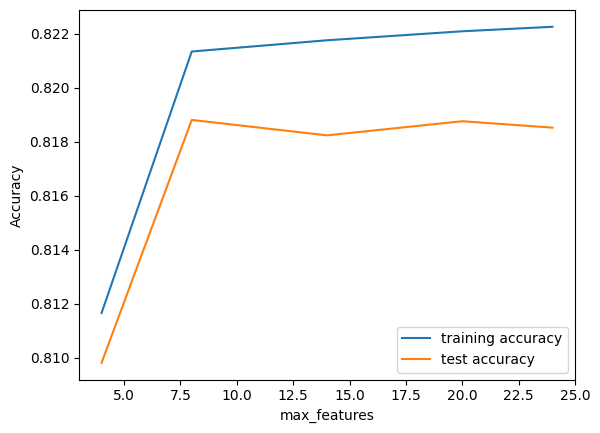

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_max_features"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features. Think about why that might be the case.

#### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

Let's now check the optimum value for min samples leaf in our case.

In [ ]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.027656,0.299107,0.055318,0.006800,100,{'min_samples_leaf': 100},0.813810,0.815952,0.814048,0.811190,...,0.813714,0.001518,1,0.817738,0.814226,0.814583,0.818452,0.819286,0.816857,0.002065
1,2.743282,0.219264,0.053285,0.007306,150,{'min_samples_leaf': 150},0.811667,0.815238,0.811905,0.805714,...,0.810762,0.003157,2,0.811488,0.813512,0.813393,0.811488,0.813690,0.812714,0.001006
2,2.565245,0.374996,0.051116,0.008503,200,{'min_samples_leaf': 200},0.809524,0.811905,0.811429,0.805238,...,0.808762,0.002803,3,0.808631,0.807976,0.811071,0.812262,0.810119,0.810012,0.001565
3,2.410580,0.330739,0.047087,0.007329,250,{'min_samples_leaf': 250},0.808810,0.810476,0.808571,0.803810,...,0.807762,0.002242,4,0.810238,0.807083,0.808095,0.810238,0.808095,0.808750,0.001270
4,2.306560,0.305694,0.046793,0.008038,300,{'min_samples_leaf': 300},0.806190,0.810714,0.807857,0.803095,...,0.806905,0.002470,5,0.804762,0.808690,0.807738,0.809940,0.810238,0.808274,0.001971


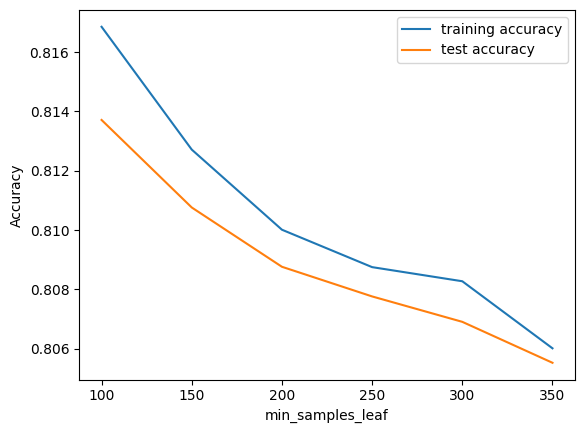

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

You can see that the model starts of overfit as you decrease the value of min_samples_leaf.

#### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [ ]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,
                    cv=n_folds,
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.489463,0.554955,0.070068,0.015504,200,{'min_samples_split': 200},0.819286,0.820952,0.823095,0.818095,...,0.820000,0.001826,1,0.824286,0.822679,0.823512,0.824226,0.824702,0.823881,0.000713
1,4.003175,0.332915,0.064848,0.010859,250,{'min_samples_split': 250},0.819524,0.820952,0.820714,0.818095,...,0.819762,0.001021,2,0.823095,0.821845,0.822917,0.823690,0.823214,0.822952,0.000610
2,4.080600,0.462896,0.057645,0.006159,300,{'min_samples_split': 300},0.818810,0.820714,0.820952,0.816667,...,0.818857,0.001765,4,0.822143,0.821369,0.822202,0.822321,0.822440,0.822095,0.000377
3,4.220024,0.968111,0.076761,0.041547,350,{'min_samples_split': 350},0.818571,0.820714,0.820000,0.815238,...,0.818429,0.001926,5,0.821190,0.819702,0.819881,0.821369,0.821131,0.820655,0.000711
4,3.553770,0.353215,0.051156,0.000877,400,{'min_samples_split': 400},0.818333,0.822143,0.821667,0.816190,...,0.819095,0.002397,3,0.820000,0.819405,0.820417,0.820655,0.820833,0.820262,0.000511


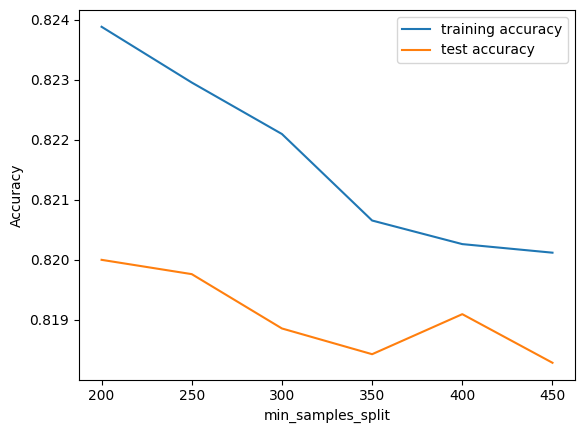

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")
plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [ ]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300],
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8183333333333334 using {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 400, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100,
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=200)

In [ ]:
# predict
predictions = rfc.predict(X_test)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      7058
           1       0.69      0.35      0.47      1942

    accuracy                           0.83      9000
   macro avg       0.77      0.66      0.68      9000
weighted avg       0.81      0.83      0.80      9000



In [ ]:
print(confusion_matrix(y_test,predictions))

[[6756  302]
 [1254  688]]



#### **QUIZ - 3**


```

If you’re performing GridSearchCV on a random forest model for the
parameters ‘max_depth’ having 3 values and ‘min_samples’ having
4 values for 10 cross-validations, how many times model.fit() is called?

a) 1440
b) 120
c) 40
d) 30
```

Answer : b

Exp: For one pair of hyper-params, since we have 10 folds we will call model.fit() 10 times, and there are 3*4 = 12 params. So 12*10 = 120








### **Randomized Search**

Just like Grid Search which is an exhaustive brute for search, we can use a Random Search as well, which will try hyper-parameters randomly from a finite list of options, or from a distribution.

It can be used when you want to try a hyper-parameter within a certain range with some asssociated probability

<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/170/541/original/fine_tuning_the_hyperparameters.jpeg?1765551090' width='800'>



<img src='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/170/542/original/fine_tuning_the_hyper_cont.jpeg?1765551113' width='800'>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300],
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
random_search = RandomizedSearchCV(estimator = rf, param_distributions= param_grid,
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 10],
                                        'max_features': [5, 10],
                                        'min_samples_leaf': range(100, 400, 200),
                                        'min_samples_split': range(200, 500, 200),
                                        'n_estimators': [100, 200, 300]},
                   verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',random_search.best_score_,'using',random_search.best_params_)

We can get accuracy of 0.8182857142857142 using {'n_estimators': 200, 'min_samples_split': 400, 'min_samples_leaf': 100, 'max_features': 10, 'max_depth': 10}


## Out of Bag Points



<img src='https://drive.google.com/uc?id=1kUgQJo0o0sVcFtUOYddWq9FTsrPVtiMQ'>



We had $n$ datapoints. And we sampled $m$ points with replacement.

These m points are used for training model instance $i$.

#### But, what about leftover n-m points ?

<img src='https://drive.google.com/uc?id=1vOQZZF2tKrvM6zhv672iYA-cTIn6fAlU'>



<img src='https://drive.google.com/uc?id=1U4nqM98FBc9KYE5caphSJXdB2pVth8l0'>

The remaining $n-m$ rows **can** be used as validation data
* for $D^i_{n-m} = D_n - D^i_m$ ,is Set Difference
 * This is referred to as Out Of Bag (OOB)

* So, we train the models on ($D^1_m$,$D^2_m$....$D^k_m$)these data sets and validate them on ($D^1_{n-m}$,$D^2_{n-m}$,....$D^k_{n-m}$) this data which is OOB sample
* If some data points are not present in any of the train data sets, they will be in every validation data chunk (low chance of this happening)

For example:


<img src='https://drive.google.com/uc?id=1h7ROdktkJH7OAhA47OWsxkK_4ILR_zAr'>

Source: wiki

> <font color= 'red'> INSTRUCTOR NOTE</font>

**Note that it is still usefull to do an overall cross Validation just like we do for other models**. Just for random forests, we have OOB data as-well to get some insight on individual trees performance

### OOB Score

Using these OOB points, we calculate OOB score/ OOB error





<img src='https://drive.google.com/uc?id=1PfexTiZ9OiAlov-unO2rVH79gBf8Mxw-'>



#### How to calculate OOB error $?$

1. Find all models (or trees, in the case of a random forest) that are not trained by the OOB instance.
    - For example:  In above figure, <font color= "offyellow"> Point C </font> will be OOB point for
     $M_1$ and $M_3$.

2. Take the majority vote of these models' result for the OOB instance
    - and compare it to the true value of the OOB instance.
    - For example: After training the RF, we pass <font color ='offyellow'>Point C</font> through $M_1$ and $M_3$ and take majority vote/mean of its prediction.
    - Then we compare the prediction with actual value of label for <font color ='offyellow'>Point C</font>

Similarly, we do this for all the points and calculate the OOB error.

#### When to use OOB Score ?

Cross validation score is more reliable. However, **occasionally the dataset is not big enough and hence set aside a part of it for validation is unaffordable**.

So, if we have less data: Random Forests, inherently keep some data aside for each tree, so we can utilise this and try to get an estimate of performance by measuring individual tree performance on OOB data.

#### **QUIZ** - 4

```
If a dataset contains "n" rows, and "m" of these rows are sampled to train the base learners in Random Forest,
what will be OOB data for each of the models?

a) Total data set "n"
b) A part of "m" sampled rows
c) Remaining "n-m" rows after sampling
d) A part of total data set will be used for all models

```
answer: c

#### **QUIZ-5**

```
The target attributes in the random forest model indicates the value of?

a) Leaf Node
b) Decision Node
c) Path
d) Root Node
```
answer: A

## Interview Questions

> ### Question: **How does Feature importance in a Random Forest work?**

* A simple way of finding the feature importance in Random Forest is by computing the feature importance of a feature in each Decision Tree and take the average of these values.

> ### Follow up Question: **What if some base learners don't have the feature?**

* The importance of that feature will be considered 0, in that Base learner
* Even if we take average of trees in which the feature is not present, it do not effect much because all the features have equal importance of being chosen.
* Let's assume there are 100 tress and column sampling rate is 0.1 , so a feature $f_{10}$  will approximately be in 10 base learners same happens with all other features also.
* So dividing by 10 or 100 doesn't matter  


<img src='https://drive.google.com/uc?id=1LVomOHNxqGG-_VUpvI7ApjaRW5ZEkWN_' >


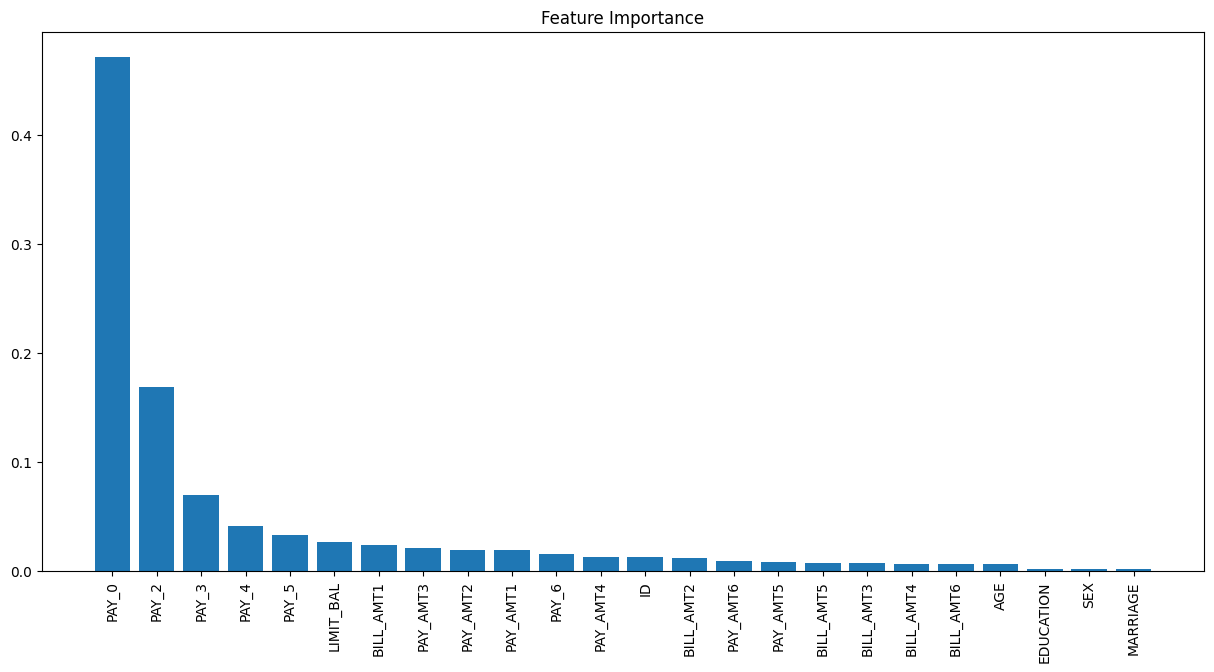

In [ ]:
# Feature Importance

import matplotlib.pyplot as plt

rfc.fit(X, y)
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

### **Bias Variance Tradeoff in RF**

#### 1. Number of Trees($k$) (important)

**What happens if number of base learners ($k$) increases?**

* As $k$ increases, we Aggregate more number of base learners
* We already saw that, Aggregation decreases the varaince without any significant increase in the bias.
* Hence, we can say that we avoid overfitting.

**What if my base learners underfit instead being overfit?**

* If the base learners underfit, the varaince is  already low
* Hence the aggregation which should reduce the variance doesn't work as expected.

#### 2. Row sample size ($m$)



* In some libraries $\frac{m}{n}$ is also considered where this value becomes maximum i.e 1 ,when $m=n$




<img src='https://drive.google.com/uc?id=1fxH8dxv8mvAJM8SucB54Q4kBpudeBnzS'>


**What happens when $m=n$ ? ($d=d'$)**
* All  Base learners overfit on the whole data and they be similar.
* So, as the $\frac{m}{n}$ increases the over-fitting of the model  increases

#### 3. Number of columns Sampled ($d'$)
* Consider $m=n$

**What happens when d' is close to d ?**


* As $\frac{d'}{d}$ increases, then all the features are being  used by each of the tree.
* This implies the overfitting increases i.e the variance increases  


#### 4. Depth of Base learners

* As depth increases, the overfitting increases
 * When the ratios $\frac{m}{n}$ and $\frac{d'}{d}$ are very less, that is when the base leraners are seeing very few columns and rows , and when the number of trees increases ($k$) the overfitting chances are low.  


<img src='https://drive.google.com/uc?id=1kvcAmHsp6HMVhi3r0s_OqU-waLTKqwOk'>


#### **QUIZ-7**

```
which one of the following in not a Hyper-parameter of Random forest?
a) Number of base learners
b) Sample size
c) Number of features in the complete dataset
d) Depth of base learners
```
Answer : c


####  **ccp_alpha**- cost complexity pruning

> **INSTRUCTOR NOTES**:
> This is important from interview point of view


* **PRUNING: Sometimes after we make a tree using the greedy approach and maximising information gain at each step, we eventually end up with some redundant or very less usefull branches. Hence after the tree is completed, we can now go back and merge / remove some paths / subtress inside the tree making it simpler and effecient. This is called Pruning**
* This is basicaly used for pruning the base learners
* We can control the overfitting and undefitting of the base learners using the value $α$, this is almost similar tp $λ$ whixh we used in linear and logistic regression
* so the idea here is to minimise the loss associated with the decision tree and $α$ times the number of terminal nodes (leaves) which controls overfitting
 * min(loss + $α$ * number of leaves in the tree)
* As the depth of tree increases we know the loss decreases, where the number of leaf nodes in increases, this trade-off between the loss and number of leaves can be controlled using $α$ like regularisation.

<img src='https://drive.google.com/uc?id=1OS3oMsWLqUUzuKEO--J_5dlyDNknjMRl'>



<img src='https://drive.google.com/uc?id=1jMy3PfJkOZWRDvLHd2D6fh8FQEcgSpjy'>
